# 1.1. Теоретический материал  – Кластеризация

Кластеризация — разбиение множества объектов на подмножества,
называемые кластерами. Кластеризация, будучи математическим алгоритм
имеет широкое применение во многих сферах: начиная с таких естественно
научных областей как биология и физиология, и заканчивая маркетингом в
социальных сетях и поисковой оптимизацией. Цель – разделить данные
таким образом, чтобы точки, находящие в одном и том же кластере, были
очень схожи друг с другом, а точки, находящиеся в разных кластерах,
отличались друг от друга. Как и алгоритмы классификации, алгоритмы
кластеризации присваивают (или прогнозируют) каждой точке данных
номер кластера, которому она принадлежит.

Задача кластеризации относится к широкому классу задач обучения
без учителя. Кластеризацию применяют для анализа и поиска признаков по
которым можно объединить объекты, сжатия данных и поиска новизны (что
не входит ни в один кластер) В чем отличие классификации и
кластеризации: при классификации у вас есть набор предопределенных
классов, вы обучаете ИИ на наборе примеров и потом хотите знать, к какому
классу принадлежит новый объект. При кластеризации вы используете
алгоритм, который пытается сгруппировать набор объектов и определить,
существует ли какая-либо взаимосвязь между объектами.

__Метод k-средних__

Кластеризация k-средних – один из самых простых и наиболее часто
используемых алгоритмов кластеризации. Сначала выбирается число
кластеров k. После выбора значения k алгоритм k-средних отбирает точки,
которые будут представлять центры кластеров (cluster centers). Затем для
каждой точки данных вычисляется его евклидово расстояние до каждого
центра кластера. Каждая точка назначается ближайшему центру кластера.
Алгоритм вычисляет центроиды (centroids) – центры тяжести кластеров.
Каждый центроид – это вектор, элементы которого представляют собой
средние значения характеристик, вычисленные по всем точкам кластера.
Центр кластера смещается в его центроид. Точки заново назначаются
ближайшему центру кластера. Этапы изменения центров кластеров и
переназначения точек итеративно повторяются до тех пор, пока границы
кластеров и расположение центроидов не перестанут изменяться, т.е. на
каждой итерации в каждый кластер будут попадать одни и те же точки
данных.

Алгоритм k-средних, наверное, самый популярный и простой
алгоритм кластеризации и очень легко представляется в виде простого
псевдокода:

1.Выбрать количество кластеров k, которое нам кажется
оптимальным для наших данных.

2.Высыпать случайным образом в пространство наших данных k
точек (центроидов).

3.Для каждой точки нашего набора данных посчитать, к какому
центроиду она ближе.

4.Переместить каждый центроид в центр выборки, которую мы
отнесли к этому центроиду.

5.Повторять последние два шага фиксированное число раз, либо
до тех пор пока центроиды не "сойдутся" (обычно это значит, что их
смещение относительно предыдущего положения не превышает какого-то
заранее заданного небольшого значения).

Стоит заметить, что можно рассчитывать расстояние между
центройдами по любой метрике (Евклидовой, Хемминговой и т.д.)

# Задание

_**Задача:**_ Дан массив данных

𝑋 = 𝑛𝑝. 𝑎𝑟𝑟𝑎𝑦([[5,3],

[10,15],

[15,12],

[24,10],

[30,45],

[85,70],

[71,80],

[60,78],

[55,52],

[80,91],])

Требуется провести кластерный анализ данных методом k-средних.
Поэкспериментируйте с количеством кластеров.

In [26]:
import numpy as np 
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score

X = np.array([[5,3], [10,15], [15,12], [24,10], [30,45], [85,70], [71,80], [60,78], [55,52], [80,91]])

for k in range(2, 10):
    kmeans = KMeans(n_clusters = k, random_state = 222)
    kmeans.fit(X)
    y_pred = kmeans.predict(X)
    score = silhouette_score(X, y_pred)
    print("Кол-во кластеров:", k, "Оценка:", score)


Кол-во кластеров: 2 Оценка: 0.6586004781412067
Кол-во кластеров: 3 Оценка: 0.5846934528951507
Кол-во кластеров: 4 Оценка: 0.3537336988045371
Кол-во кластеров: 5 Оценка: 0.29141085782352044
Кол-во кластеров: 6 Оценка: 0.1272269032844573
Кол-во кластеров: 7 Оценка: 0.11781183540579221
Кол-во кластеров: 8 Оценка: 0.16636595070776933
Кол-во кластеров: 9 Оценка: 0.09190097068243779


# Задание

_**Задача:**_ Выполните кластеризацию для набора данных ирисов Фишера. Выполните
предсказания для модели. Поэкспериментируйте с количеством кластеров.

In [21]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

iris = load_iris()
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])

# длинa чашелистика и длинa лепестка
X = df[['sepal length (cm)', 'petal length (cm)']]

for k in range(2, 6):
    kmeans = KMeans(n_clusters = k, random_state = 333)
    kmeans.fit(X)
    y_pred = kmeans.predict(X)
    score = silhouette_score(X, y_pred)
    print("Кол-во кластеров: ", k, "Оценка: ", score)

Кол-во кластеров:  2 Оценка:  0.7097529827226532
Кол-во кластеров:  3 Оценка:  0.5890584158320897
Кол-во кластеров:  4 Оценка:  0.5681506354358915
Кол-во кластеров:  5 Оценка:  0.5530891332193704


# 1.1. Теоретический материал  –Иерархическая кластеризация

Алгомеративная кластеризация относится к семейству алгоритмов
кластеризации, в основе которых лежат одинаковые принципы: алгоритм
начинает свою работу с того, что каждую точку данных заносит в свой
собственный кластер и по мере выполнения объединяет два наиболее
схожих между собой кластера до тех пор, пока не будет удовлетворен
определенный критерий остановки. Зачастую данным критерием выступает
это количество кластеров, поэтому схожие между собой кластеры
объединяются до тех пор, пока не останется заданное число кластеров.

Результатом агломеративной кластеризации является иерархическая
кластеризация. Кластеризация выполняется итеративно, и каждая точка
совершает путь от отдельной точки-кластера до участника итогового
кластера. На каждом промежуточном шаге происходит кластеризация
данных (с разным количеством кластеров). Иногда полезно сразу взглянуть
на все возможные кластеризации. Следующий пример показывает
наложение всех возможных кластеризаций, показанных на рис. и дает
некоторое представление о том, как каждый кластер распадается на более
мелкие кластеры.

# Задание

_**Задача:**_ Задание. Выполните иерархическую кластеризацию для набора данных об
ирисах Фишера. При этом необходимо использовать любые два признака
(всего их четыре).

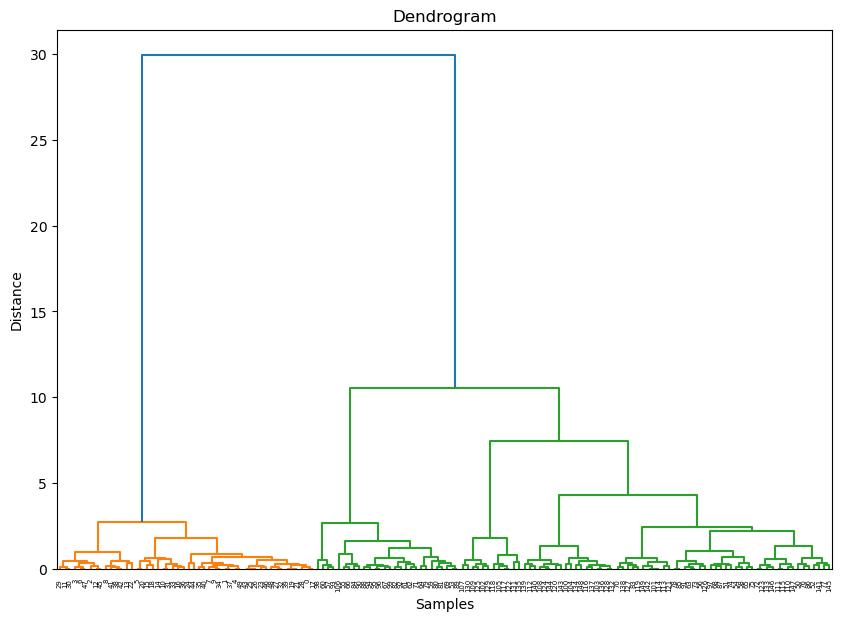

In [23]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage  # функции для иерархической кластеризации
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()

# для объединения данных признаков и целевой переменной в один массив
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])

# длина чашелистика и длина лепестка
X = df[['sepal length (cm)', 'petal length (cm)']]

# Выполняем иерархическую кластеризацию методом Ward, который минимизирует сумму квадратов расстояний между кластерами
# linkage возвращает матрицу расстояний между кластерами
Z = linkage(X, 'ward')

plt.figure(figsize=(10, 7))
plt.title('Dendrogram')

plt.xlabel('Samples') # образцы данных
plt.ylabel('Distance') # расстояния между кластерами

dendrogram(Z)
plt.show()